In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

c:\users\abala\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\abala\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\abala\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("Corona_NLP_train.csv", encoding = "ISO-8859-1")
df = df[['OriginalTweet', 'Sentiment']]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Data Prep

In [3]:
## prep the tweet
def prepTweet(tweet):
    ## remove the @s, #s, and links    
    tweetList = tweet.split(' ')
    
    for item in tweetList.copy():
        if '@' in item or '#' in item or 'https' in item:
            tweetList.remove(item)
    tweet = ' '.join(tweetList)
    
    ## fix contractions
    tweet = tweet.replace("'", "")
    
    ## remove the special 
    nTweet = ''
    for char in tweet:
        if (char.isalnum()) or (char == ' '):
            nTweet += char
        else:
            nTweet += ' '
    tweet = nTweet
    
    ## lowercase the letters
    tweet = tweet.lower()
    
    ## remove extra space
    tweet = re.sub(' +', ' ', tweet)
    
    return tweet

In [4]:
## prep the target
## change sentiment from extremely to plain
def prepTarget(text):
    if "Extremely" in text:
        text = text.split(" ")[1]
    return text

In [5]:
df['OriginalTweet'] = df['OriginalTweet'].apply(prepTweet)
df['Sentiment'] = df['Sentiment'].apply(prepTarget)
df.head()

,OriginalTweet,Sentiment
0,and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the outbr...,Negative


## Data Distribution

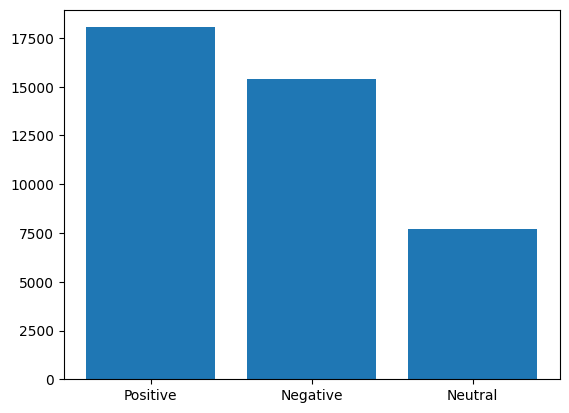

In [6]:
dist = dict(df['Sentiment'].value_counts())

plt.bar(list(dist.keys()), list(dist.values()))
plt.show()

In [7]:
df.to_csv('tweets_train.csv', index = False)

df_test = pd.read_csv('Corona_NLP_test.csv', encoding = "ISO-8859-1")
df_test = df_test[['OriginalTweet', 'Sentiment']]
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(prepTweet)
df_test['Sentiment'] = df_test['Sentiment'].apply(prepTarget)
df_test.to_csv('tweets_test.csv', index = False)